<a href="https://colab.research.google.com/github/fariba87/yolo-plate-license/blob/main/yolov8plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.8/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow --quiet
!curl -L "https://app.roboflow.com/ds/AVcuwLg0zc?key=vcW08vJiND" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


In [ ]:
#got an error (i used curl instead)
'''!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="wx01Phrfycn12jSgeVb8")
project = rf.workspace("").project("iraniplate-tqnbu")
dataset = project.version(1).download("yolov8")'''

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=./datasets/data.yaml epochs=25 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=./datasets/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False,

In [ ]:
!yolo task=detect mode=train model=yolov8n.yaml format=oonx
         

In [ ]:
# 1578 train , 149 validation data
# model: saved  in runs/detect/train2

/content


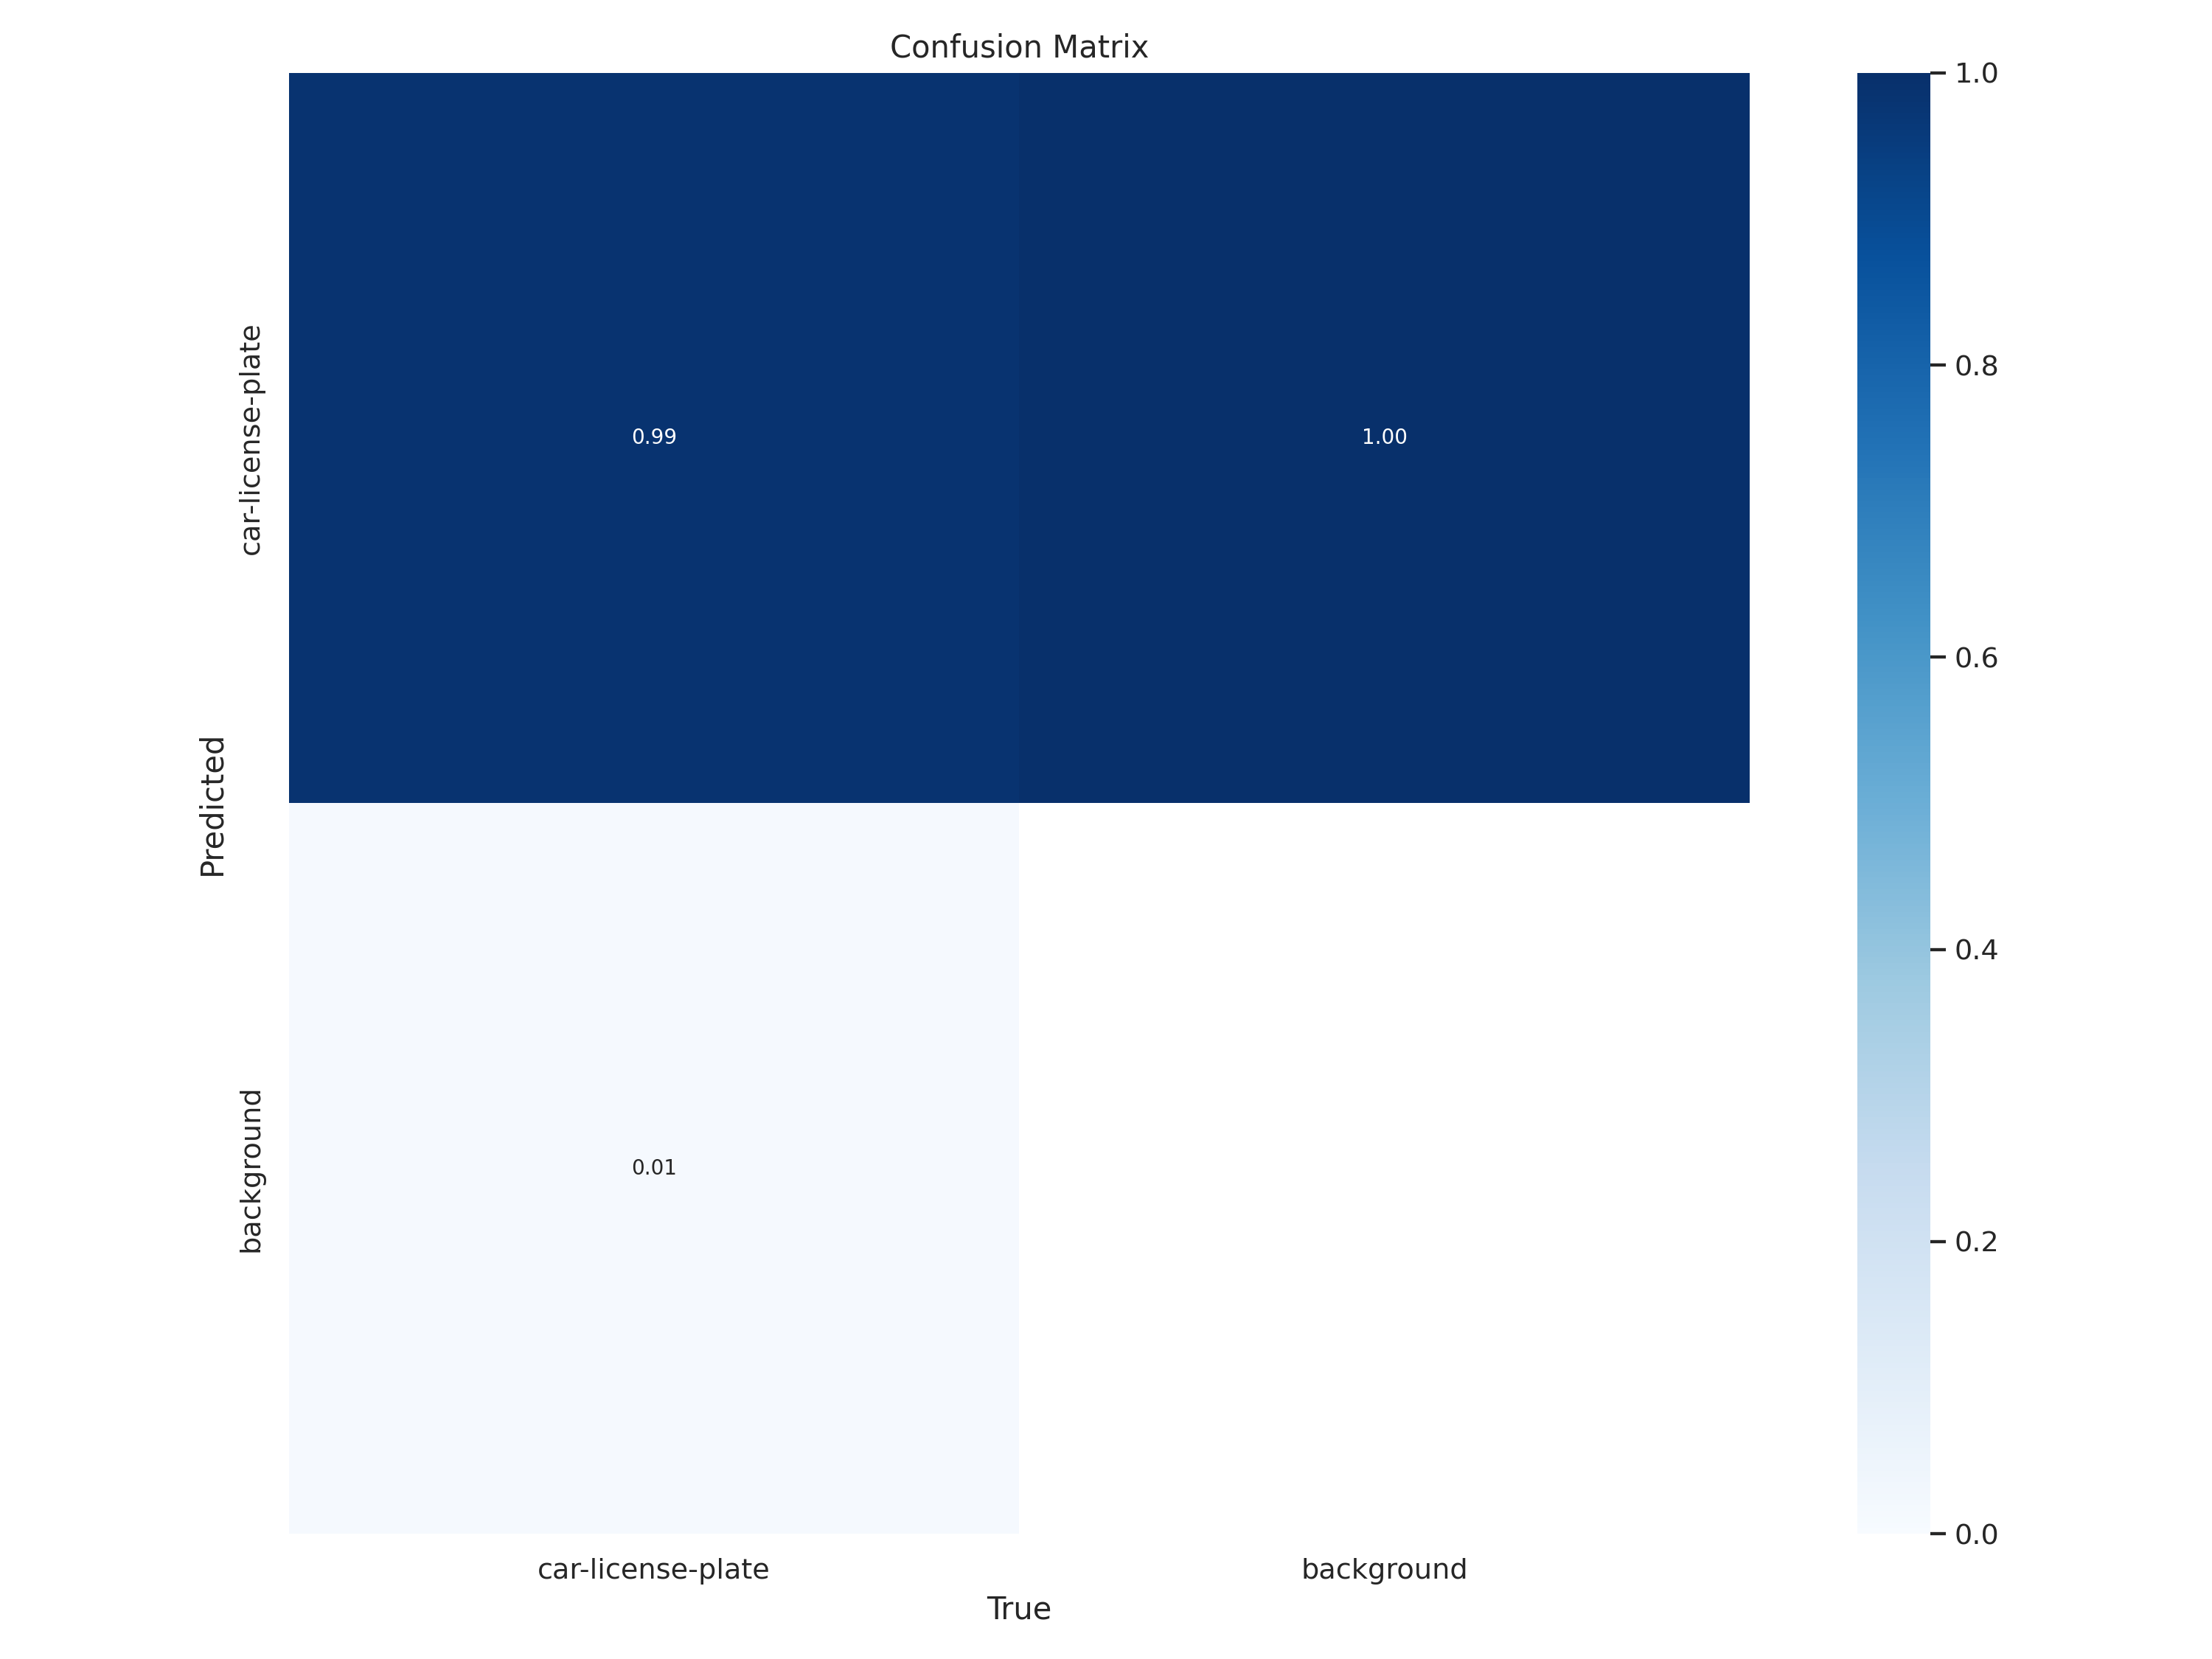

In [ ]:
%cd {HOME}
from IPython.display import Image, display
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


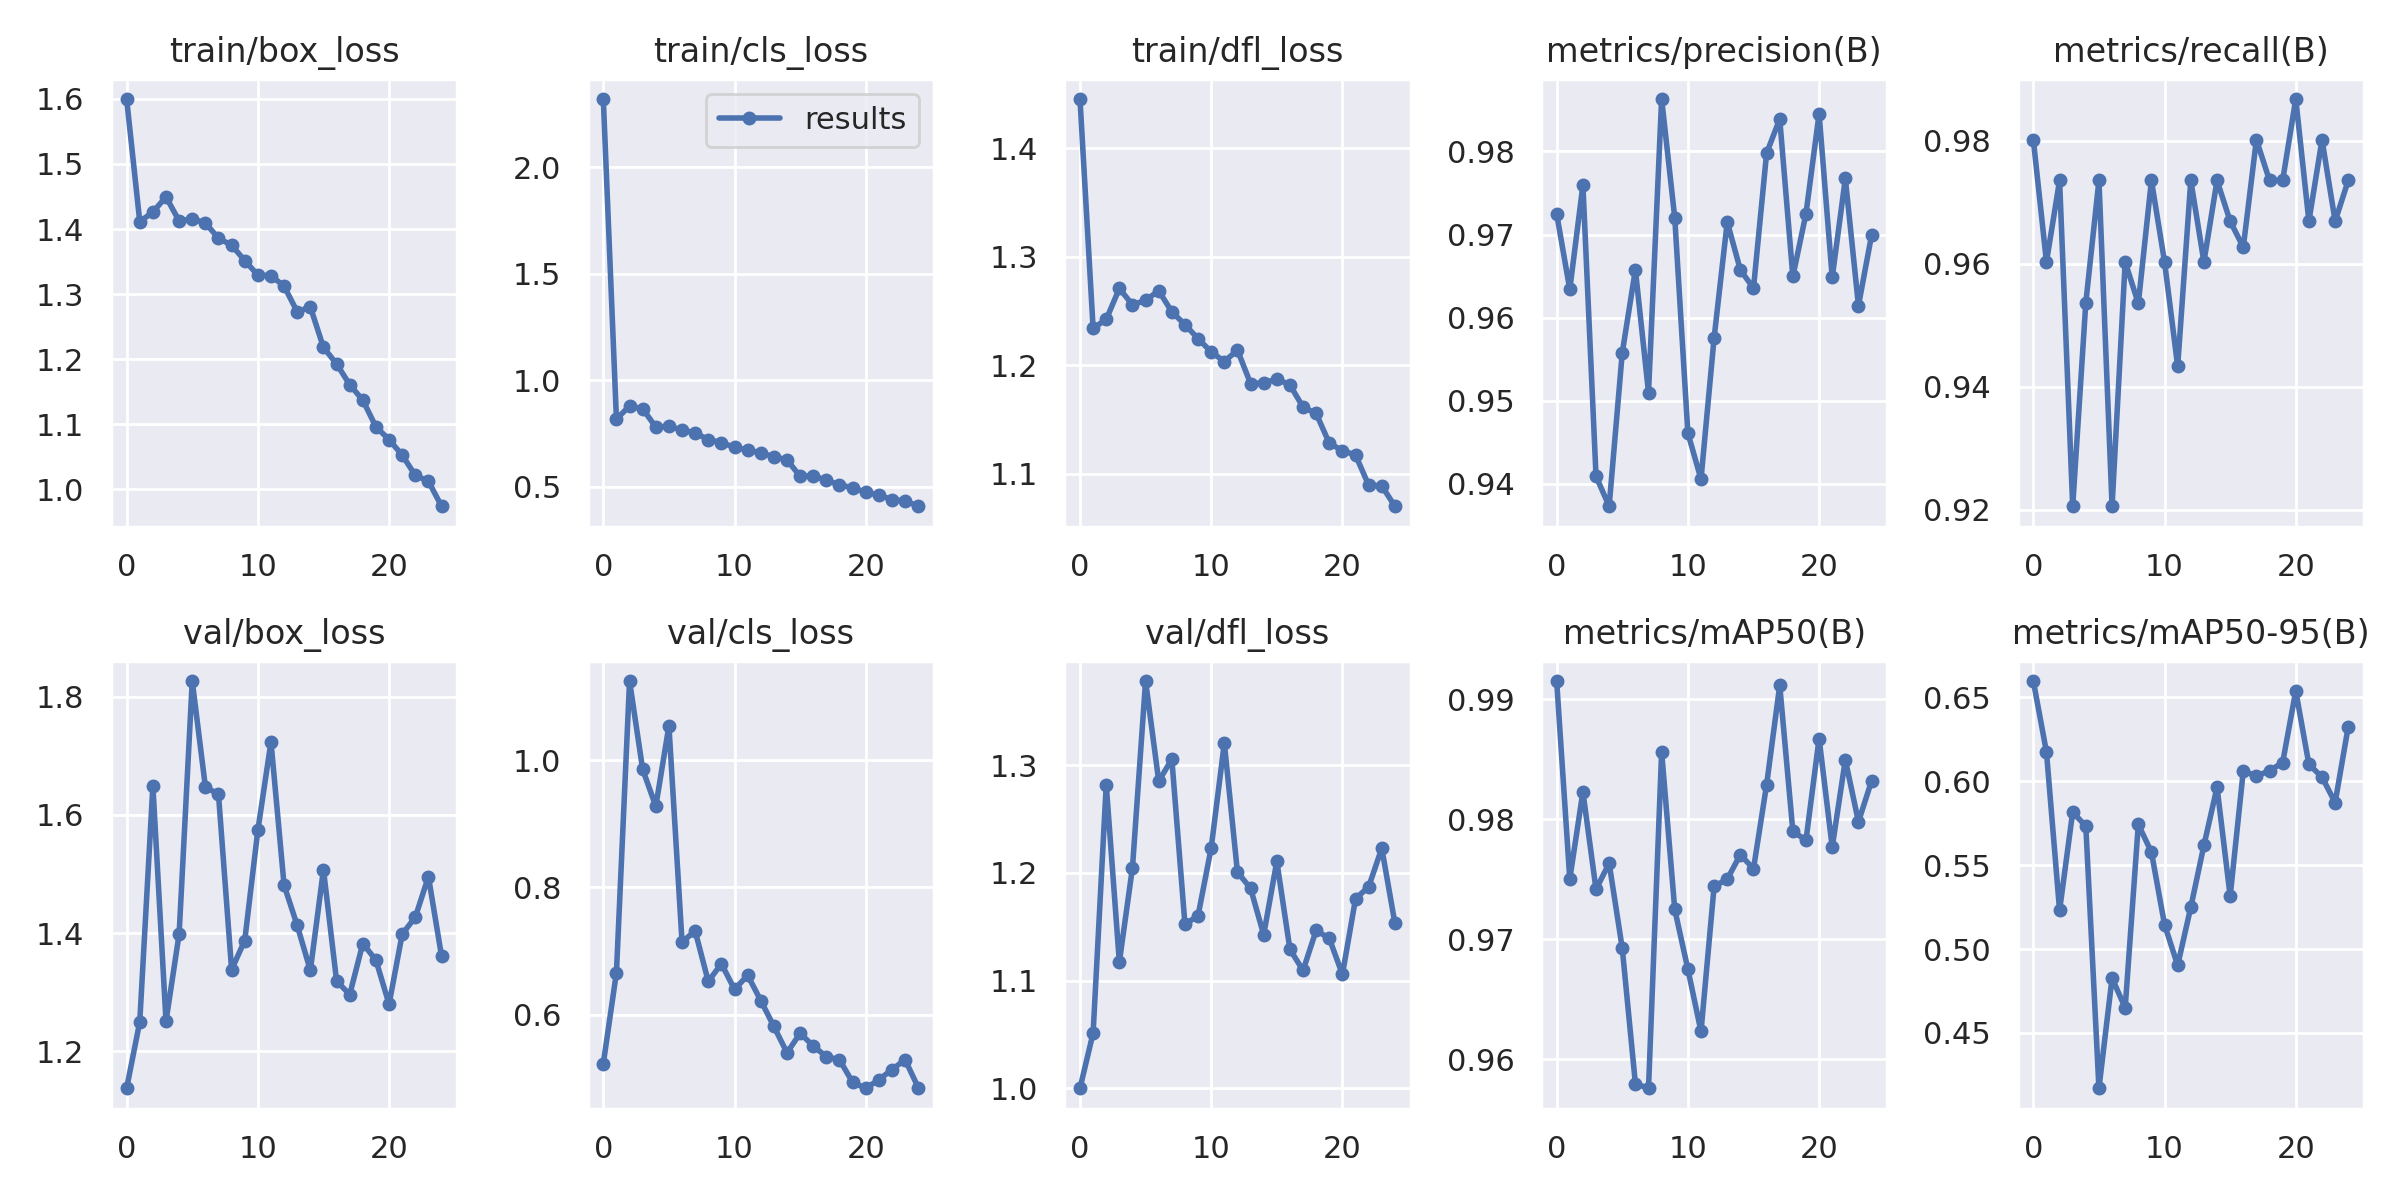

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


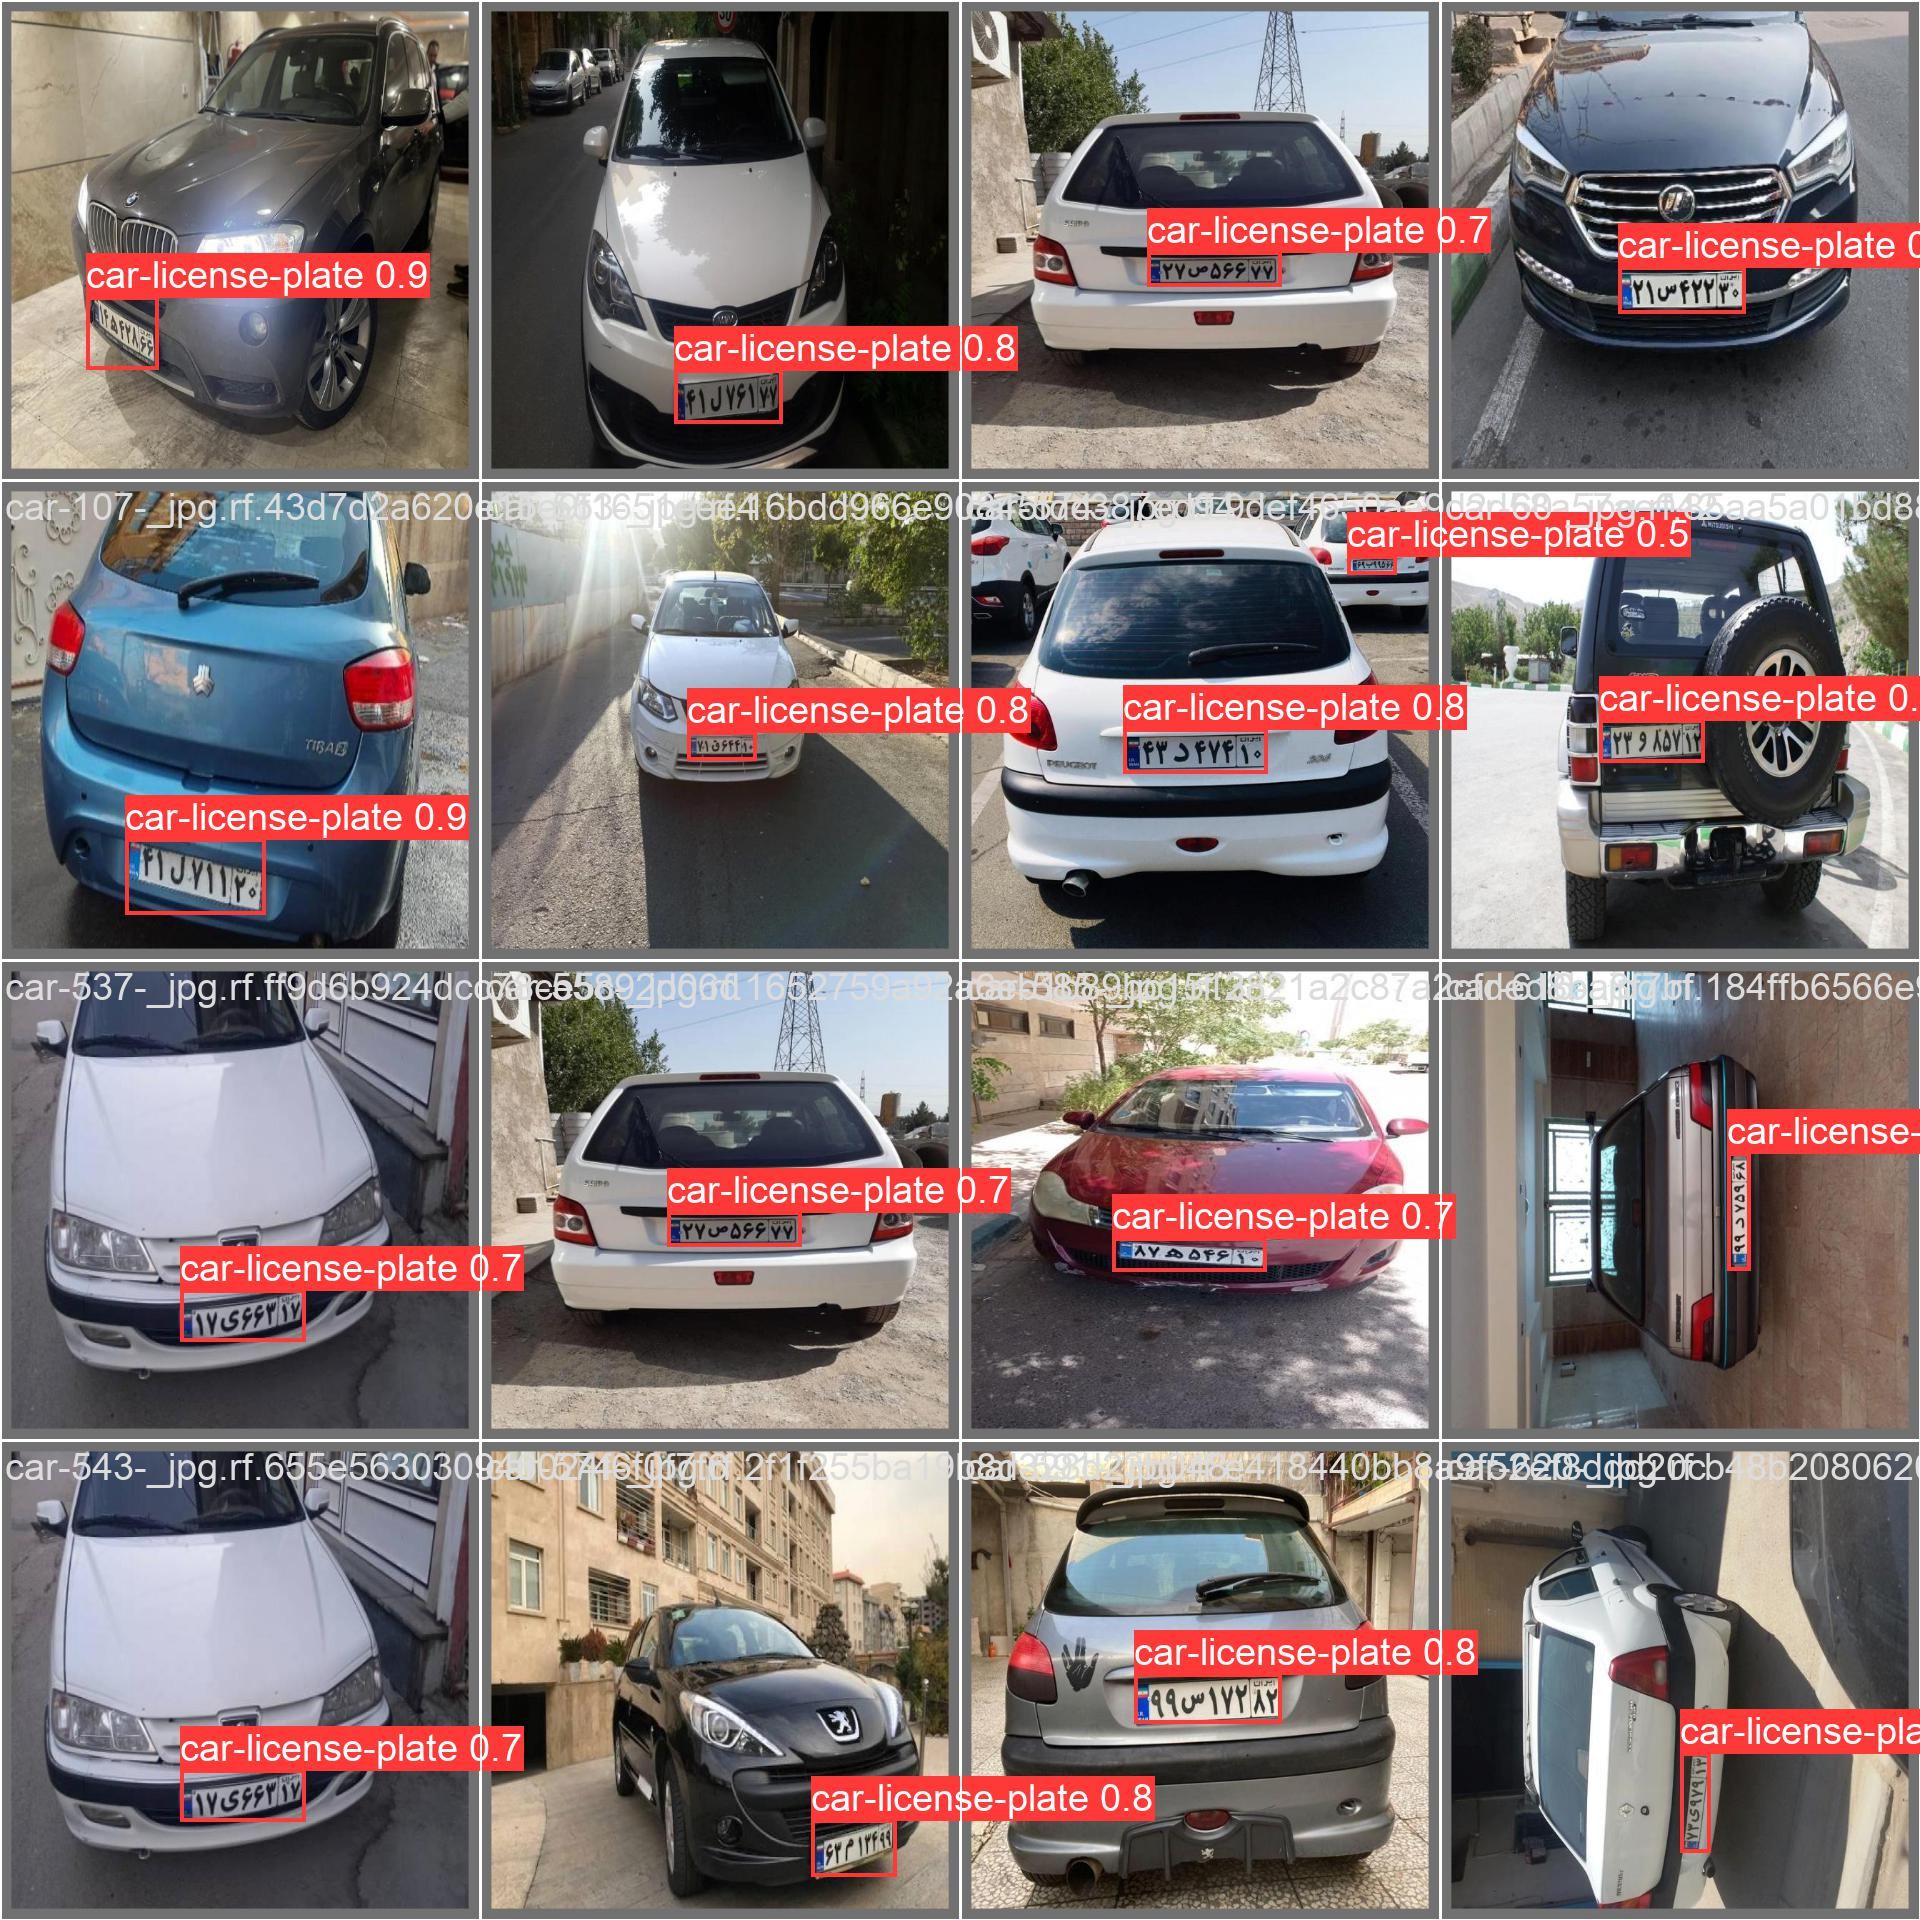

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
# or from source
# !git clone https://github.com/ultralytics/ultralytics
# %%cd ultralytics
# !pip install -e ultralytics

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")